### Lab 1.2: Binary Linear Classifier

In this lab you will try making a binary linear classifier using the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/).

You will need to install the packages ``sklearn``, ``palmerpenguins``, and ``mlxtend``.  In the following code block, the ``!`` indicates a shell command.

In [48]:
!pip install scikit-learn palmerpenguins mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [49]:
import sklearn
from palmerpenguins import load_penguins
from mlxtend.plotting import plot_decision_regions

The dataset is loaded as a [Pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).  

In [50]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


For simplicity we will drop any rows with missing values (encoded as NaNs).

In [51]:
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's select just the Adelie and Chinstrap penguins.

In [52]:
df = df[(df['species']=='Adelie')|(df['species']=='Chinstrap')]

Now we will grab the flipper length and bill length to be the features (stored in ``X``) and the species as the labels (stored in ``y``).

In [53]:
X = df[['flipper_length_mm','bill_length_mm']].values
y = df['species'].map({'Adelie':0,'Chinstrap':1}).values

## Exercises

1. Fit a binary linear classifier using scikit-learn (see ``sklearn.linear_model.LogisticRegression``).

Plot the resulting classifier using ``plot_decision_regions(X, y, clf=model)``.


<Axes: >

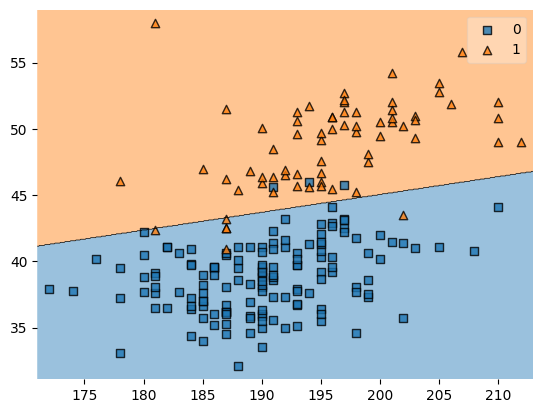

In [54]:
logreg = sklearn.linear_model.LogisticRegression() # creates a model
logreg.fit(X,y) #puts the data into the model
plot_decision_regions(X, y, clf=logreg) #plots the model that now has data

2. Print out the coefficients of the line (``model.coef_``).  Interpret these values (in terms of the direction of the line and also what they tell us about how the classifier operates).

In [55]:
print(logreg.coef_)


[[-0.15845623  1.17936568]]


This weight vector represents that the longer the flipper length, the classifier is more likely to classify as negative, or a 0, which represents an Adelie. However, the flipper length does not have a strong influence to classifying in comparison to the bill length.
The larger the bill length value, the closer it is to be classified as a the point as a Chinstrap. 

3. Calculate and print out the accuracy of the classifier using the `.score` function.  Interpret this value.

In [56]:
logreg.score(X, y)

0.9579439252336449

The score value represents the accuracy at which a given point will be correctly classified. 
In this case, our model has a 95.79% accuracy of correctly classifying the species of an entry in the dataset. 

4. Try different combinations of features and print out the accuracy for each one.  Interpret your results.

In [57]:
X = df[['bill_depth_mm', 'body_mass_g']].values


<Axes: >

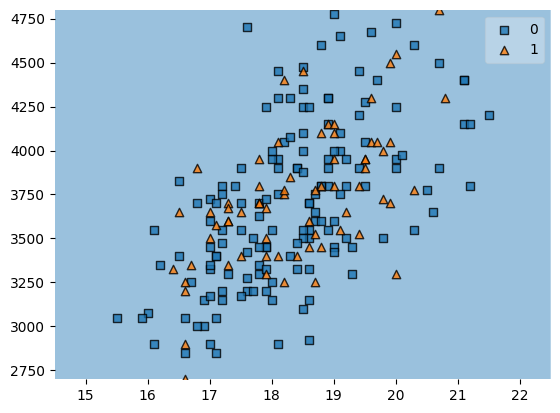

In [58]:
logreg = sklearn.linear_model.LogisticRegression() # creates a model
logreg.fit(X,y) #puts the data into the model
plot_decision_regions(X, y, clf=logreg) #plots the model that now has data

In [59]:
print(logreg.coef_)


[[3.18141782e-02 9.14189720e-05]]


In [60]:
logreg.score(X, y)

0.6822429906542056

This combination is comparing between a penguin's bill's depth and body mass. From the graph alone, this model clearly can't classify accurately. The weight values are very small, meaning that the value of the a penguin's and body mass has very low influence in classifying the species. This model has 68% accuracy of correctly classifying. 
